# 6.3 Geospatial Analysis & Visualization

## Importing Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import json
import os

In [2]:
df = pd.read_csv('C:/Users/Kid/Desktop/Achievement 6/Data/Prepared Data/imdb_movies_derived.csv', index_col=[0])

In [3]:
df.head()

title release_date  score  \
0                    Creed III   2023-03-02   73.0   
1     Avatar: The Way of Water   2022-12-15   78.0   
2  The Super Mario Bros. Movie   2023-04-05   76.0   
3                      Mummies   2023-01-05   70.0   
4                    Supercell   2023-03-17   61.0   

                                           genre  \
0                                  Drama, Action   
1             Science Fiction, Adventure, Action   
2  Animation, Adventure, Family, Fantasy, Comedy   
3  Animation, Comedy, Family, Adventure, Fantasy   
4                                         Action   

                                            overview  \
0  After dominating the boxing world, Adonis Cree...   
1  Set more than a decade after the events of the...   
2  While working underground to fix a water main,...   
3  Through a series of unfortunate events, three ...   
4  Good-hearted teenager William always lived in ...   

                                                crew     status  \
0  Michael B. Jordan, Adonis Creed, Tessa Thompso...   Released   
1  Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...   Released   
2  Chris Pratt, Mario (voice), Anya Taylor-Joy, P...   Released   
3  Óscar Barberán, Thut (voice), Ana Esther Albor...   Released   
4  Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...   Released   

             languages       budget       revenue  ...  country_proper rating  \
0              English   75000000.0  2.716167e+08  ...       Australia   High   
1              English  460000000.0  2.316795e+09  ...       Australia   High   
2              English  100000000.0  7.244590e+08  ...       Australia   High   
3   Spanish, Castilian   12300000.0  3.420000e+07  ...       Australia   High   
4              English   77000000.0  3.409420e+08  ...   United States    Mid   

     primary_genre revenue_in_mil  budget_in_mil  budget_tier profitability  \
0            Drama         271.62           75.0    High-tier          True   
1  Science Fiction        2316.79          460.0     Top-tier          True   
2        Animation         724.46          100.0    High-tier          True   
3        Animation          34.20           12.3     Mid-tier          True   
4           Action         340.94           77.0    High-tier          True   

   gross_profit   profit_tier   ROI  
0        196.62   High profit  2.62  
1       1856.79  Giant profit  4.04  
2        624.46  Giant profit  6.24  
3         21.90    Low profit  1.78  
4        263.94   High profit  3.43  

[5 rows x 21 columns]

## Wrangling & Consistency Checking

In [4]:
df.rename(columns={'country_proper':'country'}, inplace=True)

In [5]:
df.columns

Index(['title', 'release_date', 'score', 'genre', 'overview', 'crew', 'status',
       'languages', 'budget', 'revenue', 'release_year', 'country', 'rating',
       'primary_genre', 'revenue_in_mil', 'budget_in_mil', 'budget_tier',
       'profitability', 'gross_profit', 'profit_tier', 'ROI'],
      dtype='object')

In [6]:
df['country'].value_counts(dropna=False)

country
Australia             4824
United States         2618
Japan                  493
South Korea            330
France                 214
United Kingdom         167
Spain                  147
Italy                  121
Hong Kong              114
Mexico                 102
China                   85
Germany                 83
Canada                  65
Russia                  46
Argentina               39
Philippines             34
Brazil                  34
Thailand                27
India                   26
Denmark                 24
Poland                  22
Norway                  16
Türkiye                 15
Colombia                14
Netherlands             14
Taiwan                  12
Ireland                 10
Chile                    9
Sweden                   8
Indonesia                8
Peru                     7
Belgium                  6
Greece                   6
Finland                  6
Soviet Union             5
Ukraine                  4
South Africa        

#### --> Change 'Hong Kong' movies to 'China'

In [7]:
df.loc[df['country'] == 'Hong Kong', 'country'] = 'China'

#### --> Change 'Soviet Union' movies to 'Russia'

In [8]:
df.loc[df['country'] == 'Soviet Union', 'country'] = 'Russia'

#### --> Change 'Czechia' movies to 'Czech Republic'

In [9]:
df.loc[df['country'] == 'Czechia', 'country'] = 'Czech Republic'

#### --> Changing 'Türkiye' movies to 'Turkey'

In [10]:
df.loc[df['country'] == 'Türkiye', 'country'] = 'Turkey'

#### --> Changing 'United States' movies to 'United States of America'

In [11]:
df.loc[df['country'] == 'United States', 'country'] = 'United States of America'

In [12]:
#checking output
df['country'].value_counts(dropna=False)

country
Australia                   4824
United States of America    2618
Japan                        493
South Korea                  330
France                       214
China                        199
United Kingdom               167
Spain                        147
Italy                        121
Mexico                       102
Germany                       83
Canada                        65
Russia                        51
Argentina                     39
Brazil                        34
Philippines                   34
Thailand                      27
India                         26
Denmark                       24
Poland                        22
Norway                        16
Turkey                        15
Colombia                      14
Netherlands                   14
Taiwan                        12
Ireland                       10
Chile                          9
Indonesia                      8
Sweden                         8
Peru                           7
Be

In [13]:
#loading GeoJSON file
geo = r'C:/Users/Kid/Desktop/Achievement 6/Data/world-countries.json'

In [14]:
#Removing countries with less than 20 to reduce outliers

In [15]:
counts = df['country'].value_counts()
df = df[~df['country'].isin(counts[counts < 20].index)]

In [16]:
df['country'].value_counts(dropna=False)

country
Australia                   4824
United States of America    2618
Japan                        493
South Korea                  330
France                       214
China                        199
United Kingdom               167
Spain                        147
Italy                        121
Mexico                       102
Germany                       83
Canada                        65
Russia                        51
Argentina                     39
Brazil                        34
Philippines                   34
Thailand                      27
India                         26
Denmark                       24
Poland                        22
Name: count, dtype: int64

In [17]:
#creating a subset to load
country_revenue = df[['country', 'revenue_in_mil']]

In [18]:
country_revenue.head()

country  revenue_in_mil
0                 Australia          271.62
1                 Australia         2316.79
2                 Australia          724.46
3                 Australia           34.20
4  United States of America          340.94

In [19]:
#creating a Choropleth map
map = folium.Map(location = [0, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = geo, 
    data = country_revenue,
    columns = ['country', 'revenue_in_mil'],
    key_on = 'feature.properties.name',
    fill_color = 'PuRd', fill_opacity=0.6, line_opacity=0.1,
    nan_fill_color = 'white',
    legend_name = "Revenue (in mil)").add_to(map)
folium.LayerControl().add_to(map)

map

In [20]:
cr = df.groupby('country')['revenue_in_mil'].mean()

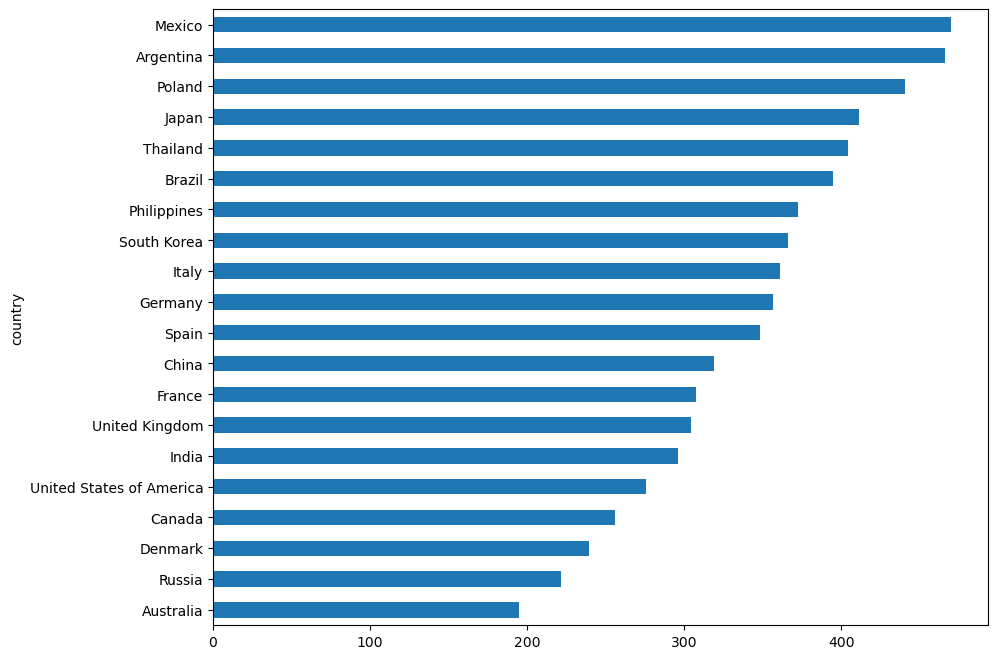

In [21]:
bar = cr.sort_values().plot(kind='barh', figsize=(10, 8))

#### Handling data irregularities:

> #### The Gross profit values were compared against the maximum gross revenues generated by domestic movies per country. 

In [22]:
#Mexico
df = df.drop(df[(df['country'] == 'Mexico') & (df['gross_profit'] > 300)].index)

>> #### Source: https://www.the-numbers.com/Mexico/movies#tab=year

In [23]:
#Argentina
df = df.drop(df[(df['country'] == 'Argentina') & (df['gross_profit'] > 132)].index)

>> #### Source: https://www.the-numbers.com/Argentina/movies#tab=year

In [24]:
#Poland
df = df.drop(df[(df['country'] == 'Poland') & (df['gross_profit'] > 137)].index)

>> #### Source: https://www.the-numbers.com/Poland/movies#tab=year

In [25]:
#Japan
df = df.drop(df[(df['country'] == 'Japan') & (df['gross_profit'] > 2256)].index)

>> #### Source: https://www.the-numbers.com/Japan/movies#tab=year

In [26]:
#Thailand
df = df.drop(df[(df['country'] == 'Thailand') & (df['gross_profit'] > 43)].index)

>> #### Source: https://www.the-numbers.com/Japan/movies#tab=year

In [27]:
#Brazil
df = df.drop(df[(df['country'] == 'Brazil') & (df['gross_profit'] > 283)].index)

>> #### Source: https://www.the-numbers.com/Brazil/movies#tab=year

In [28]:
#Philippines
df = df.drop(df[(df['country'] == 'Philippines') & (df['gross_profit'] > 76)].index)

>> #### Source: https://www.the-numbers.com/Philippines/movies#tab=year

In [29]:
#South Korea
df = df.drop(df[(df['country'] == 'South Korea') & (df['gross_profit'] > 979)].index)

>> #### Source: https://www.the-numbers.com/Korea,-Republic-of/movies#tab=year

In [30]:
#Italy
df = df.drop(df[(df['country'] == 'Italy') & (df['gross_profit'] > 376)].index)

>> #### Source: https://www.the-numbers.com/Italy/movies#tab=year

In [31]:
#Germany
df = df.drop(df[(df['country'] == 'Germany') & (df['gross_profit'] > 1079)].index)

>> #### Source: https://www.the-numbers.com/Italy/movies#tab=year

In [32]:
#Spain
df = df.drop(df[(df['country'] == 'Spain') & (df['gross_profit'] > 437)].index)

>> #### Source: https://www.the-numbers.com/Spain/movies#tab=year

In [33]:
#China
df = df.drop(df[(df['country'] == 'China') & (df['gross_profit'] > 6905)].index)

>> #### Source: https://www.the-numbers.com/China/movies#tab=year

In [34]:
#France
df = df.drop(df[(df['country'] == 'France') & (df['gross_profit'] > 1597)].index)

>> #### https://www.the-numbers.com/France/movies#tab=year

In [35]:
#United Kingdom
df = df.drop(df[(df['country'] == 'United Kingdom') & (df['gross_profit'] > 3606)].index)

>> #### Source: https://www.the-numbers.com/United-Kingdom/movies#tab=year

In [36]:
df.shape

(9357, 21)

In [37]:
#creating a subset to load
country_revenue = df[['country', 'revenue_in_mil']]

In [38]:
#creating a Choropleth map
map = folium.Map(location = [0, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = geo, 
    data = country_revenue,
    columns = ['country', 'revenue_in_mil'],
    key_on = 'feature.properties.name',
    fill_color = 'PuRd', fill_opacity=0.9, line_opacity=0.1,
    nan_fill_color = 'white',
    legend_name = "Revenue (in mil)").add_to(map)
folium.LayerControl().add_to(map)

map

#### Observation: The US, Japan and United Kingdom are the top leading countries in terms of revenues.

In [39]:
#creating a subset to load
country_budget = df[['country', 'budget_in_mil']]

In [40]:
#creating a Choropleth map
map = folium.Map(location = [0, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = geo, 
    data = country_budget,
    columns = ['country', 'budget_in_mil'],
    key_on = 'feature.properties.name',
    fill_color = 'PuRd', fill_opacity=0.9, line_opacity=0.1,
    nan_fill_color = 'white',
    legend_name = "Budget (in mil)").add_to(map)
folium.LayerControl().add_to(map)

map

#### Observation: The US, Brazil and United Kingdom are the top most spending countries on movies. 

> #### Data Limitation: Inaccurate and insufficient data (use for educational purpose only)

In [41]:
#exporting data
df.to_csv('C:/Users/Kid/Desktop/Achievement 6/Data/Prepared Data/imdb_movies_cleaned_v2.csv')